In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import warnings
import time
warnings.filterwarnings('ignore')

In [ ]:
churn_pred = pd.read_excel('/content/churn_prediction.xlsx')
churn_pred.shape


(5630, 20)

In [ ]:
churn_pred.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,NaN,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,NaN,9.0,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07
3,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231.48
4,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.0,165.14


# **EDA**

In [ ]:
churn_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
churn_pred.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


# Handle Missing value

In [ ]:
churn_pred.isna().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [ ]:
mis_val=churn_pred.select_dtypes(include=['int64','float64']).columns
for col in mis_val:
  if churn_pred[col].isna().sum()>0:
    median=churn_pred[col].median()
    churn_pred[col].fillna(median,inplace=True)

# Duplicate value

In [ ]:
churn_pred.duplicated().sum()

np.int64(0)

In [ ]:
churn_pred.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,3.0,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,2.0,9.0,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07
3,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231.48
4,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.0,165.14


# **Endcoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_cols = churn_pred.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    churn_pred[col] = le.fit_transform(churn_pred[col])

# Model Training

Split train/validate/test set

In [ ]:
from sklearn.model_selection import train_test_split
x=churn_pred.drop('Churn', axis = 1)
y=churn_pred[['Churn']]


x_train, x_temp, y_train, y_temp = train_test_split(x,y, test_size=0.3, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp,y_temp, test_size=0.5, random_state=42)
print("Number data of train set:", len(x_train))
print("Number data of validate set:", len(x_val))
print("Number data of test set:", len(x_test))

Number data of train set: 3941
Number data of validate set: 844
Number data of test set: 845


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


x_train_scaled = scaler.fit_transform(x_train)

x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       695
           1       0.91      0.74      0.82       149

    accuracy                           0.94       844
   macro avg       0.93      0.86      0.89       844
weighted avg       0.94      0.94      0.94       844



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='balanced_accuracy')
grid.fit(x_test, y_test)

print(grid.best_params_)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


# Feature Importances

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rand = RandomForestClassifier(max_depth=10, random_state=0)

clf_rand.fit(x_train, y_train)
y_ranf_pre_train = clf_rand.predict(x_train)
y_ranf_pre_test = clf_rand.predict(x_test)

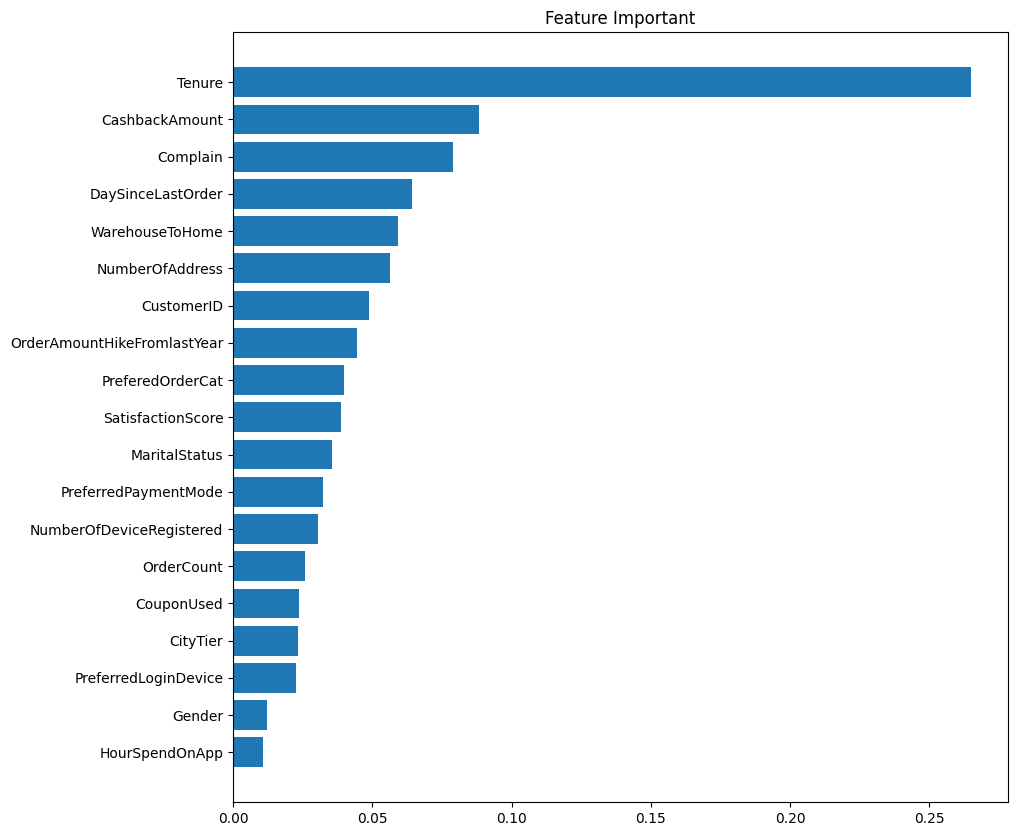

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_test.columns, clf_rand.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)

importances = importances.reset_index()

plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])

plt.title('Feature Important')

# Show plot
plt.show()

# **Câu 1**

The top 5 patterns/behavior of churned users:


1.   Tenure
2.   CashbackAmount
1.   Complain
2.   DaySinceLastOrder
1.   WarehouseToHome







**TENURE**

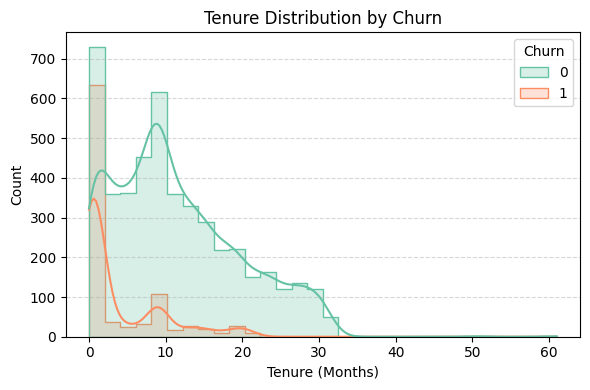

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=churn_pred, x='Tenure', hue='Churn', kde=True,
             bins=30, element='step', common_norm=False, palette='Set2')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (Months)')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

-Churn xảy ra nhiều ở nhòm tenure < 10

-Người dùng ở lại phân bố nhiều hơn, tỉ lệ churn xảy ra sớm trong vòng đời

**CashbackAmount**

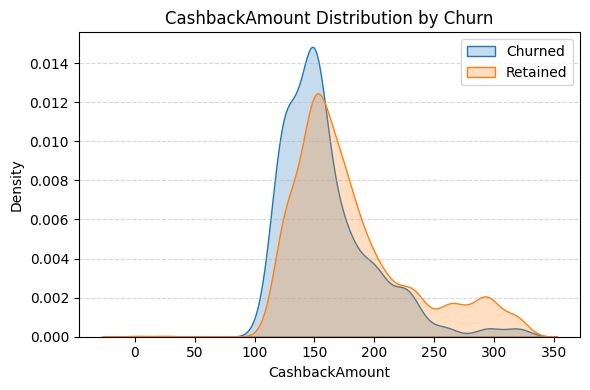

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=churn_pred[churn_pred['Churn']==1], x='CashbackAmount', label='Churned', shade=True)
sns.kdeplot(data=churn_pred[churn_pred['Churn']==0], x='CashbackAmount', label='Retained', shade=True)
plt.title('CashbackAmount Distribution by Churn')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

-Churned users có phân bố tập trung ở CashbackAmount ở mức khá thấp (<150)

-Người dùng ở lại được hoàn tiền nhiều hơn, mấu chốt để biến thành những loyalty

**Complain**

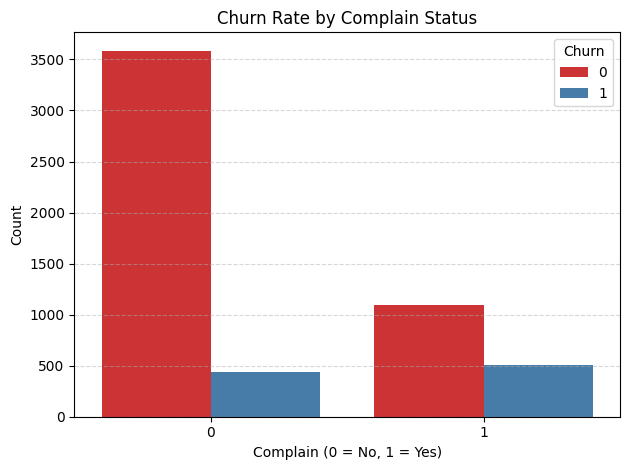

In [ ]:
sns.countplot(x='Complain', hue='Churn', data=churn_pred, palette='Set1')
plt.title('Churn Rate by Complain Status')
plt.xlabel('Complain (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Tỷ lệ churn trong nhóm có complain cao gấp nhiều lần so với nhóm không complain, có thể thấy được là đang có vấn đề về dịch vụ chăm sóc

**DaySinceLastOrder**

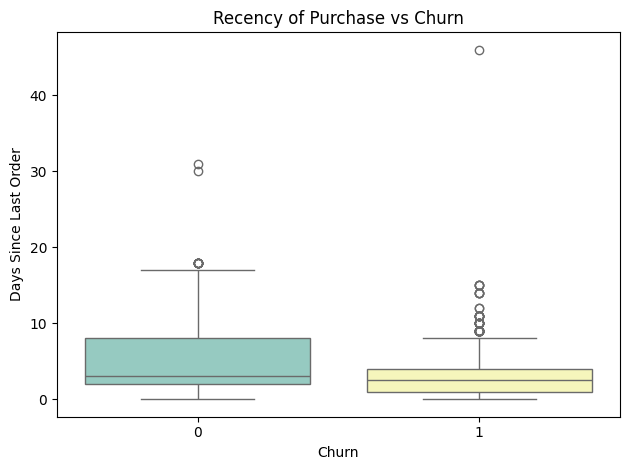

In [ ]:
sns.boxplot(x='Churn', y='DaySinceLastOrder', data=churn_pred, palette='Set3')
plt.title('Recency of Purchase vs Churn')
plt.xlabel('Churn')
plt.ylabel('Days Since Last Order')
plt.tight_layout()
plt.show()

Churn user có DaySinceLastOrder cao hơn rõ rệt → càng lâu không quay lại, nguy cơ rời bỏ càng cao



**WarehouseToHome**

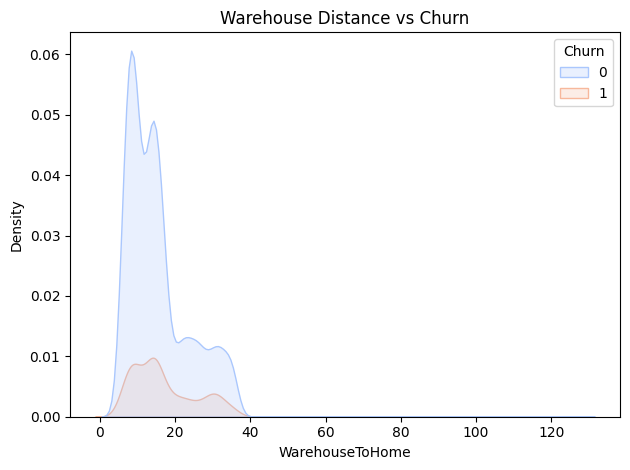

In [ ]:
sns.kdeplot(data=churn_pred, x='WarehouseToHome', hue='Churn', shade=True, palette='coolwarm',color='#d62728')
plt.title('Warehouse Distance vs Churn')
plt.tight_layout()
plt.show()

Những người ở xa hơn (30–50+ km) có xác suất churn cao hơn.

-Có thể do:
*   Giao hàng lâu
*   Phí vận chuyển cao



# **Suggestion Câu 1**

**Tenure**



*   Chăm sóc đặc biệt trong 3 tháng đầu: onboarding email, gọi điện hỗ trợ, gửi mã giảm giá.
*   Thiết kế một số chương trình hướng đến sự loyalty ví dụ như tích điểm đổi quà
*   Cảnh báo tự động khi khách mới ngừng hoạt động >10 ngày để kích hoạt phản hồi.
*   Thiết kế thêm những chương trình cho người mới





**CashbackAmount**



*   Hoàn tiền dựa trên hành vi chi tiêu.
*   Gửi thông báo hoặc banner động cho người có nguy cơ churn: “Bạn được hoàn X nếu mua trong 3 ngày tới!”
*   Với khách ít chi tiêu nhưng thường xuyên truy cập: dùng cashback như một động lực giữ chân




**Complain**



*   Training lại đội ngũ chăm sóc khách hàng,hoặc tuyển thêm
*   Phản hồi khiếu nại trong 24h, ưu tiên giải quyết trước nhóm có complain gần đây.
*   Gửi ưu đãi xin lỗi cá nhân hóa (free shipping, giảm giá đơn tiếp theo)
*   Theo dõi tần suất complain để phát hiện khách có nguy cơ cao.





**DaySinceLastOrder**



*   Thiết lập hệ thống nhắc mua lại (email, SMS): “Đã 10 ngày rồi bạn chưa quay lại”
*   Khuyến mãi kích hoạt lại nếu inactives > 7 ngày: “Mua ngay để được ưu đãi X”.






**WarehouseToHome**



*   Tăng số lượng đối tác giao hàng địa phương ở các vùng xa.
*   Tối ưu trải nghiệm giao hàng: dự báo thời gian giao, cho phép tracking theo thời gian thực
*   Áp dụng free shipping cho khu vực xa nếu đơn hàng đủ giá trị





# **Câu 2**

**Improve that model by applying the val set**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,classification_report,confusion_matrix
clf_rand = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(
    estimator=clf_rand,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(x_train, y_train.values.ravel())
print("Best Parameters: ", grid_search.best_params_)

best_model = grid_search.best_estimator_
val_preds = best_model.predict(x_val)
f1 = f1_score(y_val, val_preds, pos_label=1)
print("Validation F1-score (churn=1):", f1)


Best Parameters:  {'max_depth': 20, 'n_estimators': 100}
Validation F1-score (churn=1): 0.8134328358208955


Đánh giá lại trên tập Test

In [ ]:
test_preds = best_model.predict(x_test)
print("📊 Classification Report (Test Set):")
print(classification_report(y_test, test_preds, target_names=['Not Churn', 'Churn']))


📊 Classification Report (Test Set):
              precision    recall  f1-score   support

   Not Churn       0.94      0.99      0.96       692
       Churn       0.93      0.73      0.82       153

    accuracy                           0.94       845
   macro avg       0.94      0.86      0.89       845
weighted avg       0.94      0.94      0.94       845



F1-score (churn):81% (val)

F1-score (churn): 82% (test)

# **Câu 3**

**Lọc ra các churn users**

In [ ]:
churned_df = churn_pred[churn_pred['Churn'] == 1].copy()
churned_df.reset_index(drop=True, inplace=True)
churned_df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,53583,1,1.0,0,1,17.0,3,0,4.0,5,4,4,2,3,1,26.0,2.0,2.0,1.0,143.59
1,55053,1,1.0,0,1,17.0,3,0,4.0,5,4,4,2,3,1,26.0,1.0,2.0,1.0,143.59
2,50768,1,9.0,0,1,16.0,0,0,3.0,4,4,4,2,2,1,25.0,1.0,1.0,0.0,118.59
3,52238,1,9.0,0,1,16.0,0,0,3.0,4,4,4,2,2,1,25.0,0.0,1.0,0.0,118.59
4,52834,1,1.0,0,1,14.0,4,1,4.0,6,2,3,2,3,1,25.0,2.0,2.0,7.0,185.74


**Delete features that not importance/Endcoding**

In [ ]:
X = churned_df.drop(columns=['CustomerID', 'Churn'])
X_encoded = pd.get_dummies(X, drop_first=True)

**Scaled**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
churned_df['Cluster'] = clusters
churned_df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
0,53583,1,1.0,0,1,17.0,3,0,4.0,5,...,4,2,3,1,26.0,2.0,2.0,1.0,143.59,2
1,55053,1,1.0,0,1,17.0,3,0,4.0,5,...,4,2,3,1,26.0,1.0,2.0,1.0,143.59,2
2,50768,1,9.0,0,1,16.0,0,0,3.0,4,...,4,2,2,1,25.0,1.0,1.0,0.0,118.59,1
3,52238,1,9.0,0,1,16.0,0,0,3.0,4,...,4,2,2,1,25.0,0.0,1.0,0.0,118.59,1
4,52834,1,1.0,0,1,14.0,4,1,4.0,6,...,3,2,3,1,25.0,2.0,2.0,7.0,185.74,2


**Show Feature Importances**

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_encoded, churned_df['Cluster'])

RandomForestClassifier(random_state=42)

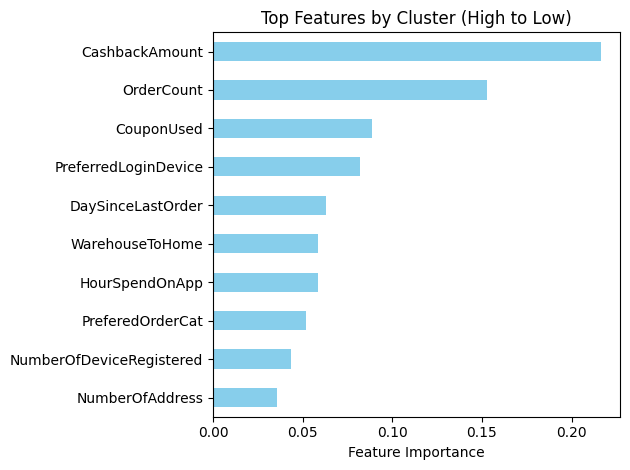

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X_encoded.columns)

importances_sorted = importances.sort_values(ascending=True)

importances_sorted.tail(10).plot(kind='barh', title='Top Features by Cluster (High to Low)', color='skyblue')
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

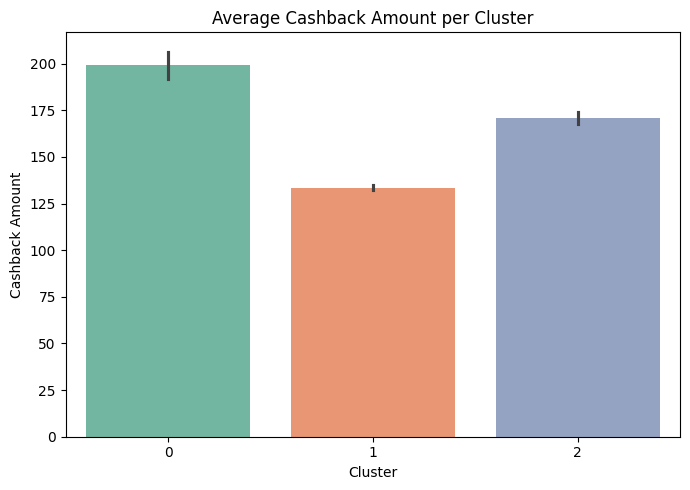

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x='Cluster', y='CashbackAmount', data=churned_df, estimator='mean', palette='Set2')
plt.title('Average Cashback Amount per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Cashback Amount')
plt.tight_layout()
plt.show()

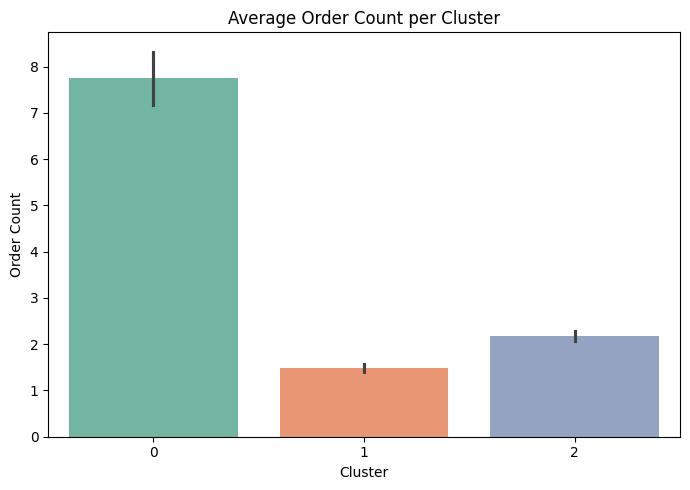

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x='Cluster', y='OrderCount', data=churned_df, estimator='mean', palette='Set2')
plt.title('Average Order Count per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

**Sự khác nhau giữa các cluster:**

1.    Cluster 0 – Khách hàng giá trị cao (High-Value Churners):


*   CashbackAmount: Cao nhất (190-210)
*   OrderCount: Cao nhất (7-10 đơn)

--> Đây là nhóm khách hàng đã từng mua nhiều và được hoàn tiền cao, tức là họ từng rất tích cực, nhưng vì lý do nào đó đã rời bỏ.

2.   Cluster 1 – Khách hàng ít tương tác (Low-Engaged Churners):


*   CashbackAmount: Thấp nhất (130-140)
*   OrderCount: Thấp nhất (~1.5 đơn)

--> Đây là nhóm khách hàng gần như không hoạt động, ít đơn hàng, ít nhận cashback. Có thể họ chưa bao giờ cảm thấy sản phẩm/dịch vụ đủ hấp dẫn.


3.   Cluster 2 – Khách hàng trung bình (Medium-Value Churners):


*   CashbackAmount: Trung bình (160-175)
*   OrderCount: Trung bình (~2 đơn)

--> Nhóm này có mức tương tác và chi tiêu trung bình. Họ có thể quay lại nếu có thúc đẩy phù hợp.












